In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop(labels='customerID',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
print(df['TotalCharges'].isnull().sum())

11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df['Churn']= df['Churn'].map({'Yes':1,"No":0})

In [9]:
num_features = df.select_dtypes(include=['int64','Float64']).columns.drop('Churn')
cat_features = df.select_dtypes(include=['object']).columns

In [10]:
num_features_B = df.select_dtypes(include=['int64','Float64']).columns.drop(['Churn','TotalCharges'])
num_features_B 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    stratify=y,
    random_state=42
)

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train[num_features] = imputer.fit_transform(X_train[num_features])
X_test[num_features] = imputer.transform(X_test[num_features])


In [13]:
X_train[cat_features].nunique().sum()

np.int64(41)

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

X_train_cat_encoded = encoder.fit_transform(X_train[cat_features])
X_test_cat_encoded = encoder.transform(X_test[cat_features])


In [15]:
X_train_B = X_train.drop('TotalCharges',axis=1)
X_test_B = X_test.drop('TotalCharges',axis=1)

In [16]:
X_train_B

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
3738,Male,0.0,No,No,35.0,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20
3151,Male,0.0,Yes,Yes,15.0,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10
4860,Male,0.0,Yes,Yes,13.0,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55
3867,Female,0.0,Yes,No,26.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50
3810,Male,0.0,Yes,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Female,0.0,Yes,No,71.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25
6227,Male,0.0,No,No,2.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05
4673,Female,1.0,No,No,25.0,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80
2710,Female,0.0,Yes,No,24.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40


In [17]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

X_train_num_scaled = Scaler.fit_transform(X_train[num_features])
X_test_num_scaled = Scaler.transform(X_test[num_features])

In [18]:
ScalerB = StandardScaler()
X_train_scaled_B = ScalerB.fit_transform(X_train_B[num_features_B])
X_test_scaled_B = ScalerB.transform(X_test_B[num_features_B])

In [19]:
X_train_final = np.hstack([X_train_num_scaled,X_train_cat_encoded])
X_test_final = np.hstack([X_test_num_scaled,X_test_cat_encoded])

In [20]:
X_train_finalB = np.hstack([X_train_scaled_B,X_train_cat_encoded])
X_test_finalB = np.hstack([X_test_scaled_B,X_test_cat_encoded])

In [21]:
X_train_final.shape

(5634, 45)

In [22]:
from sklearn.linear_model import LogisticRegression

modelA = LogisticRegression(class_weight='balanced',max_iter=1000)

modelA.fit(X_train_final,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
modelB = LogisticRegression(class_weight='balanced',max_iter=1000)

modelB.fit(X_train_finalB,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
y_probs_a = modelA.predict_proba(X_test_final)[:,1]

custom_threshold = 0.49

y_pred_custom = (y_probs_a >= custom_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [25]:
y_probs_b = modelB.predict_proba(X_test_finalB)[:,1]

custom_threshold = 0.49

y_pred_custom = (y_probs_b >= custom_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [26]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score
def threshold_sweep(y_test,y_probs):
    rows=[]
    for t in np.arange(0.1,0.9,0.05):
        y_pred = (y_probs>=t).astype(int)

        precision = precision_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        f1 = f1_score(y_test,y_pred)
        roc_aucscore = roc_auc_score(y_test,y_pred)
        Fn = ((y_test==1)&(y_pred==0)).sum()

        rows.append([t,precision,recall , f1, roc_aucscore,Fn])

    return pd.DataFrame(rows,columns=['Threshold','Precision','Recall','F1 Score','ROC_AUC SCORE','False Negatives'])

In [27]:
thresholds = threshold_sweep(y_test,y_probs_b)
thresholds

,Threshold,Precision,Recall,F1 Score,ROC_AUC SCORE,False Negatives
0,0.10,0.337580,0.991979,0.503734,0.644298,3
1,0.15,0.365731,0.975936,0.532070,0.682171,9
2,0.20,0.389794,0.959893,0.554440,0.708449,15
3,0.25,0.406250,0.938503,0.567044,0.721425,23
4,0.30,0.429630,0.930481,0.587838,0.742052,26
5,0.35,0.445623,0.898396,0.595745,0.747265,38
6,0.40,0.467930,0.858289,0.605660,0.752816,53
7,0.45,0.482595,0.815508,0.606362,0.749783,69
8,0.50,0.506993,0.775401,0.613108,0.751469,84
9,0.55,0.524528,0.743316,0.615044,0.749919,96


In [28]:
from sklearn.metrics import confusion_matrix

FN_cost = 500 # lost customer
FP_cost = 50  #unnecessary cost

def cost_based_threshold_Selection(y_test,y_prob):
    rows = []

    for t in np.arange(0.1,0.9,0.05):
        y_pred = (y_prob>=t).astype(int)
        tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
        total_cost = (fp*FP_cost) + (fn*FN_cost)

        rows.append([t,fp,fn , total_cost])
    
    df = pd.DataFrame(rows ,columns=['Threshold','False Positive','False Negetive','Total_cost'])

    best_row = df.loc[df["Total_cost"].idxmin()]
    return df,best_row

In [29]:
Best_t = cost_based_threshold_Selection(y_test,y_probs_b)

In [30]:
best_threshold = np.round(Best_t[1].Threshold,2)

In [31]:
y_pred_best = (y_probs_b >= best_threshold).astype(int)

y_pred_best

array([0, 1, 0, ..., 1, 0, 0])

In [32]:
fn_cond = (y_test==1)&(y_pred_best==0)
tp_cond = (y_test==1)&(y_pred_best==1)

fn_cases = X_test.loc[fn_cond]
tp_cases = X_test.loc[tp_cond]

In [33]:
fn_summary = fn_cases.describe(include='all')
tp_summary = tp_cases.describe(include='all')

fn_summary


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,15,15.000000,15,15,15.000000,15,15,15,15,15,15,15,15,15,15,15,15,15.000000,15.000000
unique,2,NaN,2,2,NaN,1,2,3,3,3,3,3,3,3,2,2,4,NaN,NaN
top,Male,NaN,Yes,Yes,NaN,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),NaN,NaN
freq,8,NaN,9,9,NaN,15,8,6,10,8,8,9,9,7,8,9,5,NaN,NaN
mean,NaN,0.066667,NaN,NaN,47.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.413333,4123.813333
std,NaN,0.258199,NaN,NaN,23.342787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.627103,2849.613210
min,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.300000,28.300000
25%,NaN,0.000000,NaN,NaN,39.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.950000,1816.400000
50%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.100000,3913.300000
75%,NaN,0.000000,NaN,NaN,67.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.525000,6662.250000


In [34]:
tp_summary

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,359,359.000000,359,359,359.000000,359,359,359,359,359,359,359,359,359,359,359,359,359.000000,359.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN
top,Female,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,186,NaN,242,297,NaN,324,169,246,286,249,244,286,202,188,329,265,204,NaN,NaN
mean,NaN,0.270195,NaN,NaN,15.153203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.698329,1286.938162
std,NaN,0.444680,NaN,NaN,17.246534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.448843,1669.031126
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.950000,19.300000
25%,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.250000,95.275000
50%,NaN,0.000000,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.350000,470.600000
75%,NaN,1.000000,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.475000,1900.900000


In [35]:
def compare_category(col):
    return pd.DataFrame({
        "FN": fn_cases[col].value_counts(normalize=True),
        "TP": tp_cases[col].value_counts(normalize=True)
    })


In [36]:
compare_category('tenure')

,FN,TP
tenure,,
1.0,NaN,0.222841
2.0,0.133333,0.080780
3.0,NaN,0.069638
4.0,NaN,0.061281
5.0,NaN,0.022284
...,...,...
67.0,0.066667,0.002786
68.0,0.066667,NaN
69.0,NaN,0.002786


In [37]:
compare_category("Contract")



,FN,TP
Contract,,
Month-to-month,NaN,0.916435
One year,0.533333,0.077994
Two year,0.466667,0.005571


In [38]:
compare_category("PaymentMethod")


,FN,TP
PaymentMethod,,
Bank transfer (automatic),0.333333,0.144847
Credit card (automatic),0.333333,0.128134
Electronic check,0.133333,0.568245
Mailed check,0.200000,0.158774


In [39]:
compare_category("InternetService")


,FN,TP
InternetService,,
Fiber optic,0.4,0.685237
DSL,0.4,0.253482
No,0.2,0.061281


In [40]:
compare_category("OnlineSecurity")


,FN,TP
OnlineSecurity,,
No,0.133333,0.796657
No internet service,0.200000,0.061281
Yes,0.666667,0.142061


In [41]:
compare_category("TechSupport")

,FN,TP
TechSupport,,
No,0.2,0.796657
No internet service,0.2,0.061281
Yes,0.6,0.142061


In [42]:
fn_cases[["tenure", "MonthlyCharges", "TotalCharges"]].describe()



,tenure,MonthlyCharges,TotalCharges
count,15.000000,15.000000,15.000000
mean,47.800000,74.413333,4123.813333
std,23.342787,34.627103,2849.613210
min,2.000000,19.300000,28.300000
25%,39.500000,58.950000,1816.400000
50%,55.000000,70.100000,3913.300000
75%,67.500000,103.525000,6662.250000
max,72.000000,115.650000,7968.850000


In [43]:
tp_cases[["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,359.000000,359.000000,359.000000
mean,15.153203,72.698329,1286.938162
std,17.246534,24.448843,1669.031126
min,1.000000,18.950000,19.300000
25%,2.000000,55.250000,95.275000
50%,7.000000,76.350000,470.600000
75%,24.000000,90.475000,1900.900000
max,69.000000,113.200000,7482.100000


False-negative analysis shows the model consistently misses churners with moderate charges, mid-range tenure (8–20 months), and non-electronic payment methods. This indicates the model over-relies on survival and pricing extremes and underestimates churn risk for less obvious customer segments. These patterns will guide the feature engineering and model selection in later iterations.

> # Project 2

In [45]:
background = X_train_finalB[:100]   # use your processed data

In [56]:
num_features_names = num_features_B.tolist()
cat_features_names = encoder.get_feature_names_out(cat_features).tolist()

In [61]:
feature_names_B = num_features_names + cat_features_names
len(feature_names_B), X_test_finalB.shape

(44, (1409, 44))

In [62]:
X_test_finalB_df = pd.DataFrame(
    X_test_finalB,
    columns=feature_names_B
)

X_train_finalB_df = pd.DataFrame(
    X_train_finalB,
    columns= feature_names_B
)

In [63]:
import shap 

background = X_test_finalB_df.sample(100,random_state=42)

explainer = shap.Explainer(
    modelB.predict_proba,
    background
)

shap_values = explainer(X_test_finalB_df)

d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without featu

C:\Users\devav\AppData\Local\Temp\ipykernel_20956\2482277307.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


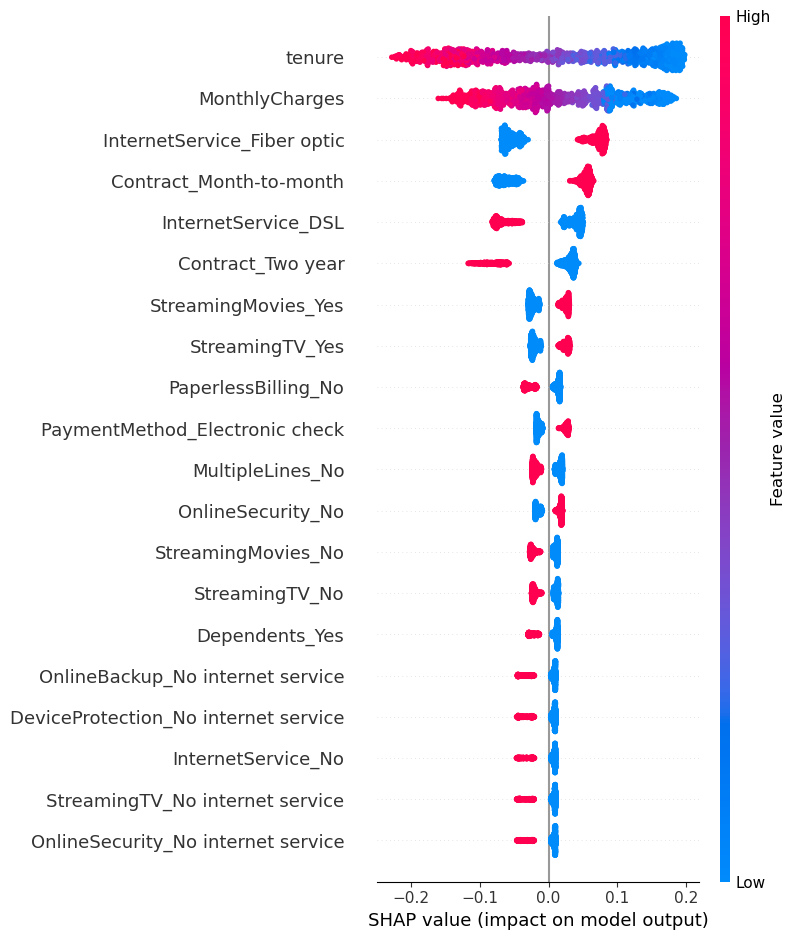

In [64]:
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_finalB_df
)


In [75]:
def retention_decision(prob, raw_row, threshold): 
    contract = raw_row["Contract"]
    tenure = raw_row["tenure"]
    charges = raw_row["MonthlyCharges"]

    if prob >= threshold :

        if contract == "Month-to-month" and charges > 70 : # 60 was the median charge 
            return "Offer retension discount"
        
        if tenure < 6 : 
            return "Priority retention call"

        return "Retention Email"
    
    return "No action"


In [76]:
def get_top_shap_reasons(i, k=3):
    vals = shap_values[i,:,1].values
    features = X_test_finalB_df.columns

    top_idx = np.argsort(np.abs(vals))[-k:][::-1]
    return features[top_idx].tolist()


In [80]:
results = []

for i in range(len(X_test)):
    prob = y_probs_b[i]
    raw_row = X_test.iloc[i]     # unprocessed customer features
    reasons = get_top_shap_reasons(i, k=3)
    
    decision = retention_decision(prob, raw_row, best_threshold)
    
    results.append({
        "customer_index": i,
        "churn_probability": round(prob, 3),
        "decision": decision,
        "top_reasons": reasons,
        "tenure": raw_row["tenure"],
        "contract": raw_row["Contract"],
        "charges": raw_row["MonthlyCharges"]
    })

df_decisions = pd.DataFrame(results)
df_decisions


,customer_index,churn_probability,decision,top_reasons,tenure,contract,charges
0,0,0.088,No action,"[tenure, MonthlyCharges, Contract_Two year]",72.0,Two year,114.05
1,1,0.867,Offer retension discount,"[tenure, MonthlyCharges, InternetService_Fiber...",8.0,Month-to-month,100.15
2,2,0.154,No action,"[Contract_Month-to-month, InternetService_DSL,...",41.0,One year,78.35
3,3,0.669,Offer retension discount,"[tenure, InternetService_Fiber optic, Contract...",18.0,Month-to-month,78.20
4,4,0.063,No action,"[tenure, Contract_Two year, Contract_Month-to-...",72.0,Two year,82.65
...,...,...,...,...,...,...,...
1404,1404,0.106,No action,"[tenure, Contract_Month-to-month, InternetServ...",49.0,One year,87.20
1405,1405,0.058,No action,"[MonthlyCharges, Contract_Two year, InternetSe...",28.0,Two year,20.30
1406,1406,0.315,Priority retention call,"[MonthlyCharges, tenure, InternetService_Fiber...",5.0,Month-to-month,20.65
1407,1407,0.022,No action,"[MonthlyCharges, tenure, Contract_Two year]",56.0,Two year,19.70


In [81]:
%pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.9/72.0 MB 17.8 MB/s eta 0:00:04
   -- ------------------------------------- 4.5/72.0 MB 11.9 MB/s eta 0:00:06
   --- ------------------------------------ 5.5/72.0 MB 9.3 MB/s eta 0:00:08
   --- ------------------------------------ 6.0/72.0 MB 7.9 MB/s eta 0:00:09
   --- ------------------------------------ 6.8/72.0 MB 6.4 MB/s eta 0:00:11
   ---- ----------------------------------- 7.3/72.0 MB 6.1 MB/s eta 0:00:11
   ---- ----------------------------------- 8.1/72.0 MB 5.7 MB/s eta 0:00:12
   ---- ----------------------------------- 8.9/72.0 MB 5.4 MB/s eta 0:00:12
   ----- ---------------------------------- 9.4/72.0 MB 5.2 MB/s eta 0:00:12
   ----- ---------------------------------- 10.5/72.0 MB 4.9 MB/s eta 0:00:13
   ------ --------------------------------- 11.8/72.0 MB 5.1 MB/s eta 0:00:12
   ------- -------------------------------- 12.8/72.0 MB 5.1 MB/s eta 0:00:12
 

Imbalance Ratio (scale_pos_weight): 2.77
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1294
           1       0.54      0.70      0.61       467

    accuracy                           0.76      1761
   macro avg       0.71      0.74      0.72      1761
weighted avg       0.79      0.76      0.77      1761



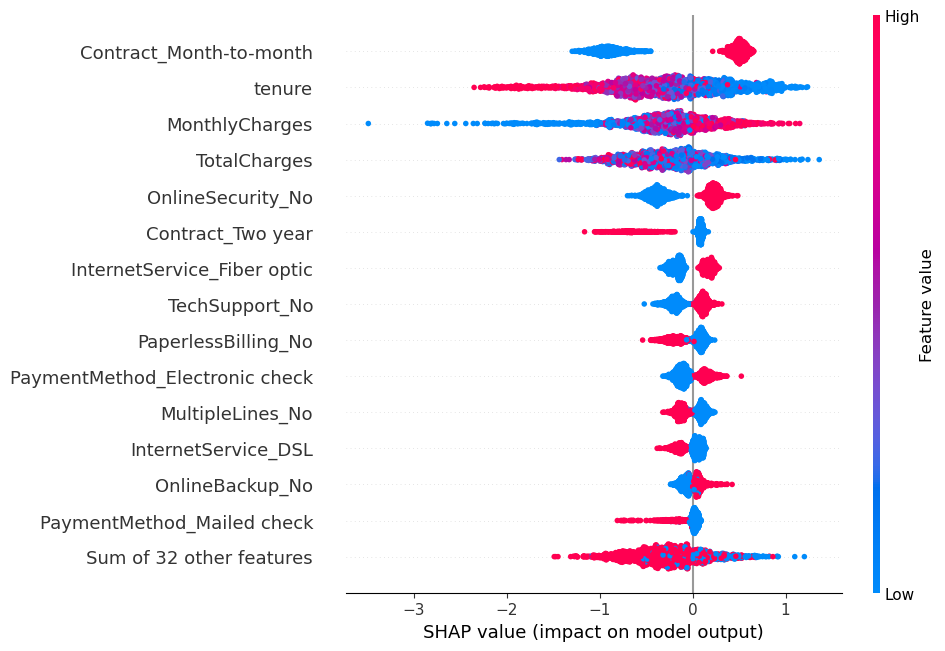

In [82]:
# %%
import pandas as pd 
import numpy as np 
import shap
import warnings
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Suppress warnings & load JS
warnings.filterwarnings('ignore') 
shap.initjs()

# %%
# 1. LOAD & CLEAN
df = pd.read_csv('data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Coerce 'TotalCharges' to numeric (handles empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# %%
# 2. DEFINE FEATURES
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

# %%
# 3. SPLIT DATA
X = df.drop('Churn', axis=1)

# Encode Target (0/1)
le = LabelEncoder()
y = le.fit_transform(df['Churn'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y
)

# Calculate scale_pos_weight for imbalance handling
# Formula: sum(negative instances) / sum(positive instances)
ratio = float(np.sum(y == 0)) / np.sum(y == 1)
print(f"Imbalance Ratio (scale_pos_weight): {ratio:.2f}")

# %%
# 4. BUILD PIPELINE (Tailored for Trees)

# Note: Trees don't need StandardScaler!
num_pipeline = Pipeline([
    ("Imputer", SimpleImputer(strategy='median')),
])

cat_pipeline = Pipeline([
    ("Imputer", SimpleImputer(strategy="most_frequent")),
    ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
], verbose_feature_names_out=False)

xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        n_estimators=500,           # Number of trees
        learning_rate=0.05,         # Step size shrinkage
        max_depth=5,                # Depth of trees
        subsample=0.8,              # Fraction of samples per tree
        colsample_bytree=0.8,       # Fraction of columns per tree
        scale_pos_weight=ratio,     # Handle class imbalance
        random_state=42,
        n_jobs=-1                   # Use all CPU cores
    ))
])

# %%
# 5. TRAIN
xgb_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = xgb_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# %%
# 6. SHAP EXPLANATION (TreeExplainer)

# Extract steps
model = xgb_pipeline.named_steps["model"]
preprocessor = xgb_pipeline.named_steps["preprocessor"]

# Transform data manually for SHAP
X_test_trans = preprocessor.transform(X_test)

# Get feature names
ohe = preprocessor.named_transformers_["cat"].named_steps["OneHotEncoder"]
feature_names = num_features + list(ohe.get_feature_names_out(cat_features))

# Create TreeExplainer (Optimized for XGBoost)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_trans)

# Attach names for plotting
shap_values.feature_names = feature_names

# %%
# 7. PLOT
shap.plots.beeswarm(shap_values, max_display=15)